In [0]:
%reset -f

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
# https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import tensorflow as tf
import time

print(tf.__version__)

1.13.1


In [0]:
import os
import numpy as np
npzfile=np.load('/content/gdrive/My Drive/python-cloud/rawtrainfile.npz')
npzfile.files

images=npzfile['arr_0']
labels=npzfile['arr_1']




In [5]:
npimages=np.array(images)
nplabels=np.array(labels)
print('images shape: {} \n labels shape: {}'.format(npimages.shape, nplabels.shape))
print('first image shape: {} \n first eleven label shape: {}'.format(npimages[0].shape, nplabels[0:10]))


images shape: (39209,) 
 labels shape: (39209,)
first image shape: (30, 29, 3) 
 first eleven label shape: [0 0 0 0 0 0 0 0 0 0]


In [6]:
from skimage.transform import resize

images48 = [resize(image, (48, 48)) for image in npimages]
print(type(images48))


/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


<class 'list'>


In [7]:
images48 = np.array(images48)
print('total number of images and size {}'.format(images48.shape))
print(images48[0].shape)

total number of images and size (39209, 48, 48, 3)
(48, 48, 3)


In [8]:
import keras
from keras.layers import Input, Embedding, GRU, LSTM, MaxPooling2D, CuDNNGRU, CuDNNLSTM, Reshape
from keras.layers import Dropout, Dense, Activation, Flatten,Conv2D,  BatchNormalization
from keras.models import Sequential
from keras.layers import LSTM  


model = Sequential()
model.add(Conv2D(1, kernel_size=(1, 1),padding='valid', strides=1, activation='relu', input_shape=(48,48,3)))
model.add(BatchNormalization())
model.add(Conv2D(29, 5, padding='valid', strides=1, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(3,  padding='valid',strides=2))
                 
model.add(Conv2D(59, 3,  padding='valid',strides=1, activation='relu')) # increase kernel size to 5
model.add(BatchNormalization())
model.add(MaxPooling2D(3,strides=2,  padding='valid'))

model.add(Conv2D(74, 3, strides=1, activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(3,strides=2,  padding='valid')) 
model.add(Flatten())
model.add(Dense(300))
model.add(Dropout(0.5))
model.add(Dense(225))
model.add(Dropout(0.5))
model.add(Reshape((15, 15)))
#model.add(LSTM(86, dropout=0.1, recurrent_dropout=0.5)) # defaults inclide tanh activation
model.add(CuDNNLSTM(86))
model.add(Dense(43, activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 1)         4         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 1)         4         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 29)        754       
_________________________________________________________________
batch_normalization_2 (Batch (None, 44, 44, 29)        116       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 29)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 19, 19, 59)        15458     
___________________________

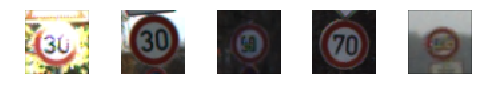

In [9]:
## Training plot

import matplotlib.pyplot as plt

traffic_signs = [250, 2120, 3400, 6500,9000]

for i in range(len(traffic_signs)):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    #plt.imshow(images27[traffic_signs[i]], cmap="gray")
    plt.imshow(images48[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    
# Show the plot
plt.show()

In [10]:

X_train=images48.astype('float32')

print(X_train.shape)

#nplabels=np.array(labels)
print("First label is %s and Total labels shape are %s" %(nplabels[0], nplabels.shape))


Y = keras.utils.to_categorical(nplabels,43)

print("after one hot coding Labels shape is:",Y.shape)
print("First Label after one hot coding:",Y[0])

(39209, 48, 48, 3)
First label is 0 and Total labels shape are (39209,)
after one hot coding Labels shape is: (39209, 43)
First Label after one hot coding: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
import pandas as pd
import os
import numpy as np
npzfilet=np.load('/content/gdrive/My Drive/python-cloud/rawtestfile.npz')
npzfilet.files

X_test=npzfilet['arr_0']
y_test=npzfilet['arr_1']



test_images = np.array(X_test)
test_labels = np.array(y_test)


In [12]:
test_images.shape

(12630,)

In [13]:
from skimage import transform
from skimage.color import rgb2gray

test_imagesnp=np.array(test_images)
    

# Transform the images to 28 by 28 pixels
test_images48 = [transform.resize(image, (48, 48)) for image in test_imagesnp]



/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


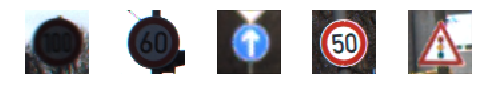

In [14]:
import matplotlib.pyplot as plt

testsigns = [150, 700, 1100, 1500,5000]

for i in range(len(testsigns)):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    #plt.imshow(images27[traffic_signs[i]], cmap="gray")
    plt.imshow(test_images48[testsigns[i]])
    plt.subplots_adjust(wspace=0.5)
    
# Show the plot
plt.show()

In [15]:
tnpimages=np.array(test_images48)
tnplabels=np.array(test_labels)
print('images shape: {} \n labels shape: {}'.format(tnpimages.shape, tnplabels.shape))
print('first image shape: {} \n first eleven label shape: {}'.format(tnpimages[0].shape, tnplabels[0:10]))


images shape: (12630, 48, 48, 3) 
 labels shape: (12630,)
first image shape: (48, 48, 3) 
 first eleven label shape: [16  1 38 33 11 38 18 12 25 35]


In [0]:
#X_test=test_images27
X_test=tnpimages.astype('float32')

Y_test = keras.utils.to_categorical(tnplabels,43)


In [17]:

start_time = time.time()
print('Start time in seconds is : {}'.format(start_time))

Start time in seconds is : 1552354681.6699047


In [18]:


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

epoch=150
history=model.fit(X_train, Y, validation_data=(X_test, Y_test),epochs=epoch, batch_size=128, shuffle=True, verbose=1)


Instructions for updating:
Use tf.cast instead.
Train on 39209 samples, validate on 12630 samples
Epoch 1/150
39209/39209 [==============================] - 15s 395us/step - loss: 2.3875 - acc: 0.3050 - val_loss: 1.6279 - val_acc: 0.4604
Epoch 2/150
39209/39209 [==============================] - 13s 338us/step - loss: 1.3405 - acc: 0.5548 - val_loss: 1.2505 - val_acc: 0.5799
Epoch 3/150
39209/39209 [==============================] - 13s 341us/step - loss: 0.9744 - acc: 0.6811 - val_loss: 0.9641 - val_acc: 0.6947
Epoch 4/150
39209/39209 [==============================] - 13s 340us/step - loss: 0.7078 - acc: 0.7727 - val_loss: 0.7477 - val_acc: 0.7781
Epoch 5/150
39209/39209 [==============================] - 13s 340us/step - loss: 0.4944 - acc: 0.8458 - val_loss: 0.6834 - val_acc: 0.7952
Epoch 6/150
39209/39209 [==============================] - 13s 340us/step - loss: 0.3161 - acc: 0.9043 - val_loss: 0.4670 - val_acc: 0.8747
Epoch 7/150
39209/39209 [==============================] - 13s

In [19]:
print("Total time to run %s seconds" % (time.time() - start_time))


Total time to run 2014.4268584251404 seconds


In [20]:

print('final learning rate',keras.backend.eval(model.optimizer.lr))

v=history.history['val_acc']
test_accuracy=v[-10 :]
print('test accuracy average for 10 epochs is :', sum(test_accuracy) / len(test_accuracy))


final learning rate 0.001
test accuracy average for 10 epochs is : 0.9660570070267855


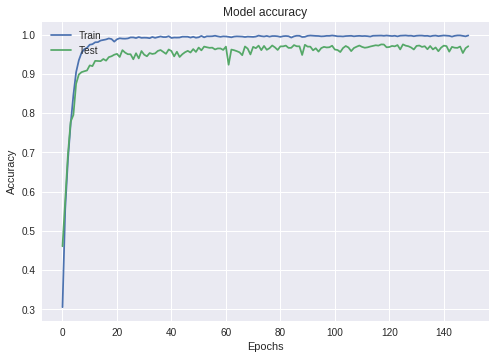

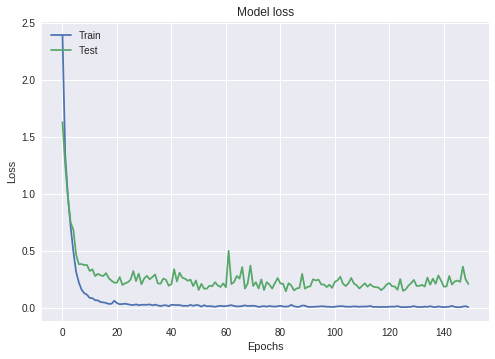

In [21]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
# y_prob = model.predict(tnpimages)
# y_prob[1]

In [23]:
ypred=model.predict_classes(tnpimages)
tnplabels[10]

12

In [24]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(tnplabels, ypred)
print(cm)

[[ 60   0   0 ...   0   0   0]
 [  0 714   0 ...   0   0   0]
 [  0   2 747 ...   0   0   0]
 ...
 [  1   2   0 ...  61   0   3]
 [  0   0   0 ...   0  57   0]
 [  0   0   0 ...   1  10  77]]


In [25]:
from sklearn.metrics import classification_report
print(classification_report(tnplabels, ypred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       0.99      0.99      0.99       720
           2       0.99      1.00      0.99       750
           3       0.97      0.97      0.97       450
           4       0.98      0.98      0.98       660
           5       0.95      0.97      0.96       630
           6       0.97      0.96      0.97       150
           7       0.97      0.99      0.98       450
           8       0.97      0.97      0.97       450
           9       0.99      0.99      0.99       480
          10       1.00      0.99      1.00       660
          11       0.99      0.99      0.99       420
          12       0.99      0.98      0.99       690
          13       0.98      1.00      0.99       720
          14       0.94      0.99      0.97       270
          15       1.00      1.00      1.00       210
          16       0.96      1.00      0.98       150
          17       1.00    

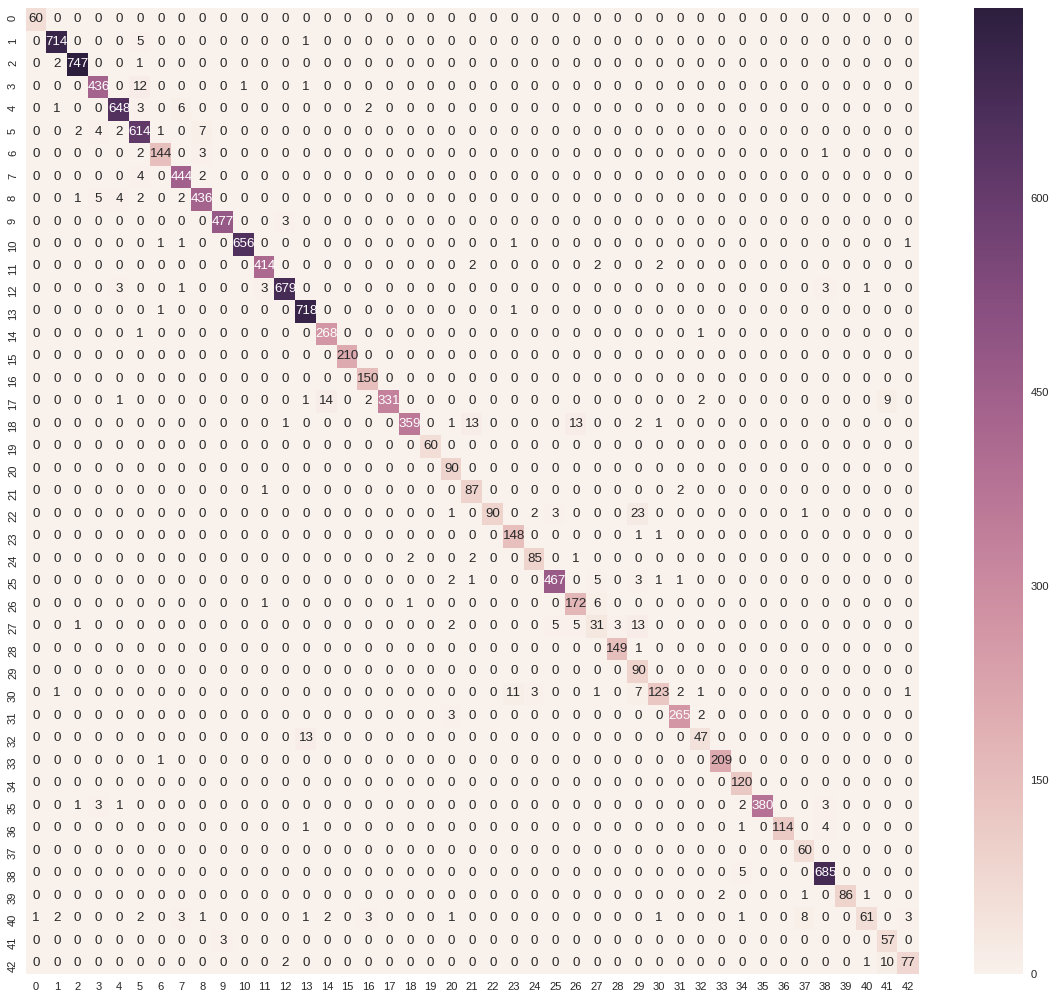

In [26]:
import seaborn as sns
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')


sns.heatmap(confusion_matrix(tnplabels, ypred),annot=True,fmt="d") 


In [0]:
data1=tnpimages


97.05463182142776
88.574821836686
80.45922407911395
75.13064132827856
69.91290579215931
66.00950118859231
62.73159144609954
60.49089468101235
57.73555029599514
55.281076797491394
53.499604117181306
51.322248596476825
49.80205859207295
48.27395091808135
46.50039587904325
44.85352335236701
43.483768809625104
42.34362628945074
41.42517814632455
39.493269994913916


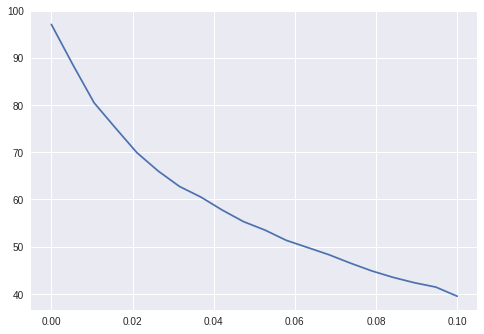

In [28]:
## gaussian noise evaluation

from skimage.util import random_noise
from skimage import transform
import matplotlib.pyplot as plt

import numpy as np
vara=np.linspace(0, 0.1, 20)
i=0
b=np.zeros((len(vara),1))
for a in vara:

  gaussian_noise_imgs = [random_noise(image, mode='gaussian',mean=0,var=a,seed=None, clip=True) for image in data1]
  gaussian_noise_imgs=np.array(gaussian_noise_imgs)
  
  gaussian_noise_imgs=gaussian_noise_imgs.astype('float32')
  score = model.evaluate(gaussian_noise_imgs, Y_test, batch_size=128, verbose=0)
  b[i]=score[1]*100
  i+=1

  print(score[1]*100)
  
 
fig, ax = plt.subplots()
ax.plot(vara, b)

  
 

In [0]:

data2=tnpimages

In [30]:

sd1=[10, 10,10]
sd2=[20, 20,20]
sd3=[30, 30,30]
sd4=[40, 40,40]
sd5=[50, 50,50]
sd6=[6.3, 6.3, 6.3]
sd7=[12.75, 12.75, 12.75]
sd8=[19.21, 19.21, 19.21]
sdrange=[sd1,sd2,sd3,sd4,sd5,sd6,sd7,sd8]


nprn=np.zeros(3)

for sd in sdrange:
  i=0
  for values in sd:
      nsd=values/255
      varsd=nsd*nsd
      gaussian_noise_imgs = [random_noise(image, mode='gaussian',mean=0,var=varsd,seed=None, clip=True) for image in data2]
      gaussian_noise_imgs=np.array(gaussian_noise_imgs)
      
      gaussian_noise_imgs=gaussian_noise_imgs.astype('float32')
      score = model.evaluate(gaussian_noise_imgs, Y_test, batch_size=128, verbose=0)
      print('Accuracy is:', score[1], 'for sd', values)  
      nprn[i]=score[1]
      i+=1

      

  avgsd=nprn
  print(' accuracy average is :', sum(avgsd) / len(avgsd))


Accuracy is: 0.9471892321289105 for sd 10
Accuracy is: 0.9481393509315104 for sd 10
Accuracy is: 0.9490102928022686 for sd 10
 accuracy average is : 0.9481129586208965
Accuracy is: 0.868962787184938 for sd 20
Accuracy is: 0.8666666668365611 for sd 20
Accuracy is: 0.8679334914882506 for sd 20
 accuracy average is : 0.8678543151699166
Accuracy is: 0.7664291369565781 for sd 30
Accuracy is: 0.7634996042115672 for sd 30
Accuracy is: 0.7657165479206982 for sd 30
 accuracy average is : 0.7652150963629478
Accuracy is: 0.6729216152113389 for sd 40
Accuracy is: 0.6699129057515734 for sd 40
Accuracy is: 0.6709422012689278 for sd 40
 accuracy average is : 0.6712589074106133
Accuracy is: 0.5930324624288865 for sd 50
Accuracy is: 0.5924782265959896 for sd 50
Accuracy is: 0.5920031669209708 for sd 50
 accuracy average is : 0.5925046186486157
Accuracy is: 0.9612826601815243 for sd 6.3
Accuracy is: 0.9623119554723527 for sd 6.3
Accuracy is: 0.9620744258566499 for sd 6.3
 accuracy average is : 0.9618896

psnr of original image and true image : 14.048203183814504
float64
float64


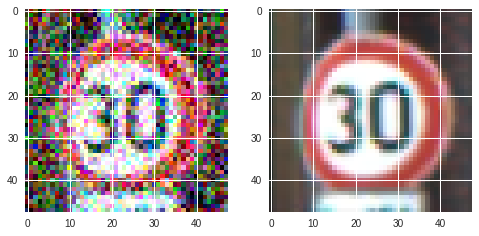

In [31]:
  #psnr calculatioon
  
  import skimage
  import numpy as np
  from skimage import img_as_float
  b=1
  
  a = random_noise(tnpimages[b], mode='gaussian',mean=0,var=0.05,seed=None, clip=True) 
  plt.subplot(1, 2,1)
  plt.imshow(a)
  plt.subplot(1, 2,2)
  c=tnpimages[b]
  plt.imshow(c)
  imtrue=img_as_float	(c)
  imtest=a
  print('psnr of original image and true image :',skimage.measure.compare_psnr(imtrue, imtest, data_range=None))
  
  print(imtrue.dtype)
  print(imtest.dtype)

In [0]:

model.save('/content/gdrive/My Drive/python-cloud/New/keras4_CUlstm_adam.h5')